<a href="https://colab.research.google.com/github/maciejmochocki/MyRepo/blob/main/ProjektTemat10v2MaciejMochocki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/week2_model_based/mdp.py

In [2]:
transition_probs = {
    'Stacja': {
        'trawa wysoka': {'Stacja': 0.05, 'Ogrod': 0.95},
        'trawa srednia': {'Stacja': 0.1, 'Ogrod': 0.9},
        'trawa niska': {'Stacja': 0.15, 'Ogrod': 0.85}
    },
    'Ogrod': {
        'trawa wysoka': {'Stacja': 0.1, 'Skwer': 0.9},
        'trawa srednia': {'Stacja': 0.15, 'Skwer': 0.85},
        'trawa niska': {'Stacja': 0.2, 'Skwer': 0.8}
    },
    'Skwer': {
        'trawa wysoka': {'Stacja': 0.15, 'Pomnik przyrody': 0.85},
        'trawa srednia': {'Stacja': 0.2, 'Pomnik przyrody': 0.8},
        'trawa niska': {'Stacja': 0.25, 'Pomnik przyrody': 0.75}
    },
    'Pomnik przyrody': {
        'trawa wysoka': {'Stacja': 0.2, 'Ogrod Botaniczny': 0.8},
        'trawa srednia': {'Stacja': 0.25, 'Ogrod Botaniczny': 0.75},
        'trawa niska': {'Stacja': 0.3, 'Ogrod Botaniczny': 0.7}
    },
    'Ogrod Botaniczny': {
        'trawa wysoka': {'Stacja': 1},
        'trawa srednia': {'Stacja': 1},
        'trawa niska': {'Stacja': 1}
    }
}
rewards = {
    'Stacja': {'trawa wysoka': {'Stacja': -15, 'Ogrod': +15},
          'trawa srednia': {'Stacja': -10, 'Ogrod': +10},
          'trawa niska': {'Stacja': -5, 'Ogrod': +5}},
    'Ogrod': {'trawa wysoka': {'Stacja': -15, 'Skwer': +15},
          'trawa srednia': {'Stacja': -10, 'Skwer': +10},
          'trawa niska': {'Stacja': -5, 'Skwer': +5}},
    'Pomnik przyrody': {'trawa wysoka': {'Stacja': -15, 'Ogrod Botaniczny': +15},
          'trawa srednia': {'Stacja': -10, 'Ogrod Botaniczny': +10},
          'trawa niska': {'Stacja': -5, 'Ogrod Botaniczny': +5}},
    'Ogrod Botaniczny': {'trawa wysoka': {'Stacja': +30},
          'trawa srednia': {'Stacja': +20},
          'trawa niska': {'Stacja': +10}}
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='Stacja')

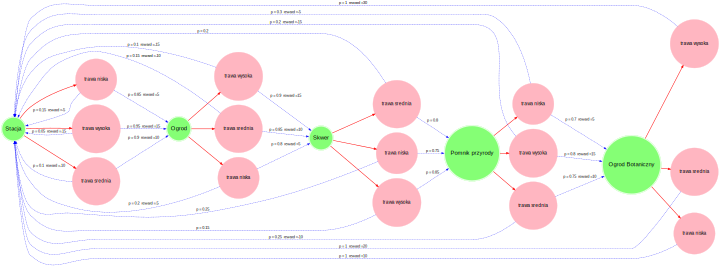

In [3]:
from mdp import has_graphviz
from IPython.display import display

if has_graphviz:
    from mdp import plot_graph
    display(plot_graph(mdp))

In [4]:
import random
state = mdp.reset()

for t in range(200):

  action = random.choice(mdp.get_possible_actions(state))
  observation, reward, done, info = mdp.step(action)
  state = observation

  print(t, observation, reward, done)

0 Ogrod 15 False
1 Stacja -10 False
2 Ogrod 15 False
3 Stacja -5 False
4 Ogrod 10 False
5 Skwer 5 False
6 Pomnik przyrody 0.0 False
7 Ogrod Botaniczny 5 False
8 Stacja 10 False
9 Ogrod 5 False
10 Skwer 15 False
11 Pomnik przyrody 0.0 False
12 Stacja -10 False
13 Ogrod 5 False
14 Skwer 5 False
15 Stacja 0.0 False
16 Ogrod 5 False
17 Skwer 5 False
18 Pomnik przyrody 0.0 False
19 Ogrod Botaniczny 15 False
20 Stacja 10 False
21 Stacja -10 False
22 Ogrod 15 False
23 Skwer 5 False
24 Pomnik przyrody 0.0 False
25 Stacja -10 False
26 Ogrod 5 False
27 Skwer 10 False
28 Pomnik przyrody 0.0 False
29 Ogrod Botaniczny 15 False
30 Stacja 20 False
31 Ogrod 10 False
32 Skwer 10 False
33 Pomnik przyrody 0.0 False
34 Ogrod Botaniczny 5 False
35 Stacja 30 False
36 Ogrod 15 False
37 Skwer 10 False
38 Stacja 0.0 False
39 Ogrod 15 False
40 Skwer 15 False
41 Pomnik przyrody 0.0 False
42 Ogrod Botaniczny 10 False
43 Stacja 20 False
44 Ogrod 15 False
45 Skwer 15 False
46 Pomnik przyrody 0.0 False
47 Ogrod Bota

In [5]:
def get_action_value(mdp, state_values, state, action, gamma):
  Q = 0.

  for next_state in mdp.get_next_states(state, action):
    
    prob = mdp.get_transition_prob(state, action, next_state)
    reward = mdp.get_reward(state, action, next_state)
    Q += prob * (reward + (gamma * state_values[next_state]))

  return Q

In [6]:
def get_new_state_value(mdp, state_values, state, gamma):
  
  if mdp.is_terminal(state):
    return 0

  return max([get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)])

In [7]:
gamma = 0.95
num_iter = 100
min_diff = 0.001

state_values = {s: 0 for s in mdp.get_all_states()}

for t in range(num_iter):

    new_state_values = {state: get_new_state_value(mdp, state_values, state, gamma) for state in mdp.get_all_states()}

    diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())

    print(t, diff, state_values)

    state_values = new_state_values

    if diff < min_diff:
        break

0 30.0 {'Stacja': 0, 'Ogrod': 0, 'Skwer': 0, 'Pomnik przyrody': 0, 'Ogrod Botaniczny': 0}
1 25.365000000000002 {'Stacja': 13.5, 'Ogrod': 12.0, 'Skwer': 0.0, 'Pomnik przyrody': 9.0, 'Ogrod Botaniczny': 30.0}
2 21.689390624999998 {'Stacja': 24.971249999999998, 'Ogrod': 13.2825, 'Skwer': 9.618749999999999, 'Pomnik przyrody': 34.365, 'Ogrod Botaniczny': 42.825}
3 18.70615134375 {'Stacja': 26.673590624999996, 'Ogrod': 22.5963, 'Skwer': 31.308140624999997, 'Pomnik przyrody': 46.291537500000004, 'Ogrod Botaniczny': 53.72268749999999}
4 17.28541345751953 {'Stacja': 35.1601563046875, 'Ogrod': 41.30245134375, 'Skwer': 41.1814031953125, 'Pomnik przyrody': 54.89722471874999, 'Ogrod Botaniczny': 55.33991109374999}
5 16.421142784643557 {'Stacja': 52.44556976220703, 'Ogrod': 50.550314580937496, 'Skwer': 49.33983123380858, 'Pomnik przyrody': 57.73876212914061, 'Ogrod Botaniczny': 63.40214848945312}
6 14.221846721379933 {'Stacja': 61.61282347300092, 'Ogrod': 59.167884832316005, 'Skwer': 54.097544110395

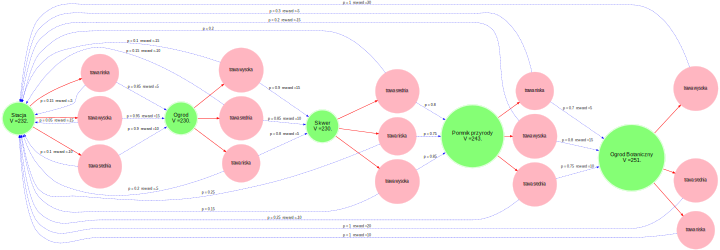

In [8]:
if has_graphviz:
  from mdp import plot_graph_with_state_values
  display(plot_graph_with_state_values(mdp, state_values))

In [9]:
def get_optimal_action(mdp, state_values, state, gamma):
    if mdp.is_terminal(state):
        return None
    
    action_values = [get_action_value(mdp, state_values, state, action, gamma) for action in mdp.get_possible_actions(state)]
    argmax_index = np.argmax(action_values)
    return mdp.get_possible_actions(state)[argmax_index]

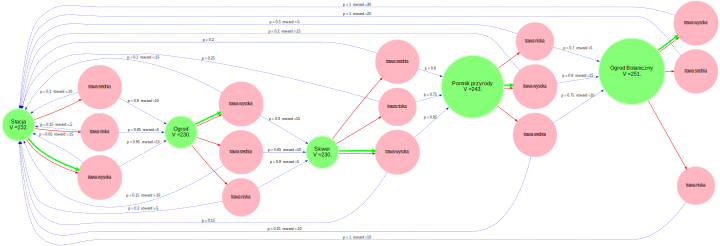

In [10]:
if has_graphviz:
    from mdp import plot_graph_optimal_strategy_and_state_values
    display(plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value))

In [11]:
s = mdp.reset()
mdp.render()

for t in range(100):
    a = get_optimal_action(mdp, state_values, s, gamma)
    s, r, done, _ = mdp.step(a)
    print(t, a, r)
    mdp.render()
    
    if done:
        break

Currently at Stacja
0 trawa wysoka 15
Currently at Ogrod
1 trawa wysoka 15
Currently at Skwer
2 trawa wysoka 0.0
Currently at Pomnik przyrody
3 trawa wysoka 15
Currently at Ogrod Botaniczny
4 trawa wysoka 30
Currently at Stacja
5 trawa wysoka 15
Currently at Ogrod
6 trawa wysoka 15
Currently at Skwer
7 trawa wysoka 0.0
Currently at Pomnik przyrody
8 trawa wysoka -15
Currently at Stacja
9 trawa wysoka 15
Currently at Ogrod
10 trawa wysoka -15
Currently at Stacja
11 trawa wysoka -15
Currently at Stacja
12 trawa wysoka -15
Currently at Stacja
13 trawa wysoka 15
Currently at Ogrod
14 trawa wysoka -15
Currently at Stacja
15 trawa wysoka 15
Currently at Ogrod
16 trawa wysoka 15
Currently at Skwer
17 trawa wysoka 0.0
Currently at Stacja
18 trawa wysoka 15
Currently at Ogrod
19 trawa wysoka -15
Currently at Stacja
20 trawa wysoka 15
Currently at Ogrod
21 trawa wysoka 15
Currently at Skwer
22 trawa wysoka 0.0
Currently at Pomnik przyrody
23 trawa wysoka 15
Currently at Ogrod Botaniczny
24 trawa